<a href="https://colab.research.google.com/github/maxwang12/readability-analysis-through-linknestedness/blob/main/Sampling_GetLinks_Data_2024_Link_nestedness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
!pip install igraph
!pip install stop_words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32897 sha256=e315352f88c78d1da5cc42edb94c5a2ab490197bc42d4fa7a7343d43840aff89
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [ ]:
!pip download stop_words

  Using cached stop-words-2018.7.23.tar.gz (31 kB)
  Preparing metadata (setup.py) ... done
Saved ./stop-words-2018.7.23.tar.gz
Successfully downloaded stop_words


In [ ]:
#NLP
import re
import os
import sys
from stop_words import get_stop_words
from markdown import markdown
import ssl
import string
import urllib.request
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import random


#Sklearn
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#plotting
from matplotlib import *
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import igraph
import plotly.graph_objects as go
import re
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

#classic imports
import numpy as np
import pylab as pl
from tqdm import tqdm
import time

#dataframes
import pandas as pd
import sqlite3
import sqlite3 as db
from sqlite3 import Error

#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.probability import DictionaryProbDist

#stats
from scipy.stats import percentileofscore
import string
#stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Import Privacy Policies Full Dataset

In [ ]:
#df_sample is tinytiny play version of the data set to mess with its only 001% random sample of the entire dataset
#df_full is the whole thing which I cant even load without my compt crashing
#df_full_selectcolumns is just the columns we need for the below

df_full = pd.read_csv("/content/drive/MyDrive/RESEARCH/PROJECTS/CODE AND DATA/Pirvacy_Policies_OT/JoinedComboData.csv")
# df_full_selectcolumns = pd.read_csv("/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/itybittysample001Data.csv")
#df_full_selectcolumns = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PrivacyPolicies_df.csv')

<ipython-input-44-061d838de609>:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("/content/drive/MyDrive/RESEARCH/PROJECTS/CODE AND DATA/Pirvacy_Policies_OT/JoinedComboData.csv")


In [ ]:
# df_full_small = df_full.head()
# df_full_small

In [ ]:
df_full['categories'].value_counts().head(20)

categories
business                              176990
business;education                    117478
business;informationtech               92945
shopping                               61255
education                              60815
uncategorized                          46567
business;shopping                      46320
entertainment                          42018
parked                                 29172
adult                                  21246
informationtech                        20109
business;economyandfinance             19357
education;entertainment                16983
business;entertainment                 16771
business;education;entertainment       14002
business;education;informationtech     12971
games                                  11091
business;travel                         9497
education;health                        8607
sports                                  8221
Name: count, dtype: int64

In [ ]:
df_full['year'].value_counts()

year
2016    108437
2015    106473
2014    100074
2017     95326
2013     94500
2012     85913
2019     74755
2018     73098
2011     72792
2010     54829
2009     40444
2008     38006
2007     31906
2006     26038
2005     18856
2004     16077
2003     12653
2002      9878
2001      6647
2000      3898
1999       715
1998       165
1997         9
Name: count, dtype: int64

In [ ]:
# select a filtered dataframe that only includes df_full['categories'] that equal  'business', 'business;education', 'business;informationtech'

filtered_df = df_full[df_full['categories'].isin(['business', 'business;education', 'business;informationtech', 'shopping', 'education', 'uncategorized',
                                         'business;shopping', 'entertainment', 'parked',  'adult', 'informationtech', 'business;economyandfinance',
                                          'education;entertainment', 'business;entertainment', 'business;education;entertainment',  'business;education;informationtech',
                                          'games', 'business;travel', 'education;health', 'sports'])]
filtered_df

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,flesch_kincaid,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank
0,1,31160,https://web.archive.org/web/20031122123614id_/...,https://web.archive.org/web/20031207185149id_/...,docusign.com/eDocuSign/privacy.asp,https://web.archive.org/web/20031122123614id_/...,2003,B,1,1,...,14.938384,18.351184,difficult,14137.0,37519a313f07f98fdbb51f13779ed7d6cb1b4468,862964595037544195,31160,docusign.com,business;informationtech,NaN
1,2,31160,https://web.archive.org/web/20040924214154id_/...,https://web.archive.org/web/20040816044548id_/...,docusign.com/privacy.asp,https://web.archive.org/web/20041014005441id_/...,2004,B,2,2,...,13.762202,18.171460,difficult,14366.0,837c2e1fdab142cebb3cc008880309ee94a6ecbf,863527407568723719,31160,docusign.com,business;informationtech,NaN
2,2,31160,https://web.archive.org/web/20040924214154id_/...,https://web.archive.org/web/20040816044548id_/...,docusign.com/privacy.asp,https://web.archive.org/web/20041014005441id_/...,2004,B,2,2,...,NaN,NaN,NaN,NaN,NaN,,31160,docusign.com,business;informationtech,NaN
3,3,31160,https://web.archive.org/web/20061026200451id_/...,https://web.archive.org/web/20061219215634id_/...,docusign.com/resources/privacy_policy.php,https://web.archive.org/web/20061026200451id_/...,2006,B,3,3,...,13.640407,18.062587,difficult,14363.0,9296f990b576e40dec5d0e54552918247192bd8f,4321728971435908871,31160,docusign.com,business;informationtech,NaN
4,4,31160,https://web.archive.org/web/20060402203037id_/...,https://web.archive.org/web/20060616002221id_/...,docusign.com/resources/privacy_policy.php,https://web.archive.org/web/20060402203037id_/...,2006,A,3,4,...,13.640407,18.062587,difficult,14363.0,9296f990b576e40dec5d0e54552918247192bd8f,4321728971435908871,31160,docusign.com,business;informationtech,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071483,1071482,2096,https://web.archive.org/web/20190111081507id_/...,https://web.archive.org/web/20190210183758id_/...,99corporates.com/Privacy-Policy,https://web.archive.org/web/20190111081507id_/...,2019,A,333902,842722,...,NaN,NaN,NaN,NaN,NaN,,2096,99corporates.com,business,378885.0
1071485,1071484,2139,https://web.archive.org/web/20051029144936id_/...,https://web.archive.org/web/20051215073951id_/...,bizhosting.com/fs_img/search/privacy-statement...,https://web.archive.org/web/20051029060456id_/...,2005,B,123172,842724,...,12.289975,14.362554,difficult,9356.0,6eee8ba1d310c630efd189588ec1e5d2955cafb4,12763498574590014752,2139,9f.com,uncategorized,NaN
1071486,1071485,2139,https://web.archive.org/web/20060511043337id_/...,https://web.archive.org/web/20060615202203id_/...,bizhosting.com/fs_img/search/privacy-statement...,https://web.archive.org/web/20060511212252id_/...,2006,A,123172,842725,...,12.289975,14.362554,difficult,9356.0,6eee8ba1d310c630efd189588ec1e5d2955cafb4,12763498574590014752,2139,9f.com,uncategorized,NaN
1071487,1071486,2139,https://web.archive.org/web/20061026031807id_/...,https://web.archive.org/web/20061206112004id_/...,bizhosting.com/fs_img/search/privacy-statement...,https://web.archive.org/web/20061024181129id_/...,2006,B,123174,842726,...,12.289975,14.362554,difficult,9376.0,2fc708ac357c49f2ffd168ce9bd38df1ae8ba1bb,12763498574590014752,2139,9f.com,uncategorized,NaN


In [ ]:
filtered_df['year'].value_counts()


year
2016    83710
2015    82922
2014    78196
2013    74168
2017    73227
2012    67105
2019    57896
2018    56336
2011    55979
2010    42294
2009    31448
2008    29948
2007    25247
2006    20534
2005    14830
2004    12573
2003     9806
2002     7557
2001     5041
2000     2935
1999      536
1998      121
1997        6
Name: count, dtype: int64

In [ ]:
#drop all rows where filtered_df['year'] < 2009

filtered_df = filtered_df[filtered_df['year'] >= 2009]
filtered_df


,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,flesch_kincaid,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank
12,11,31160,https://web.archive.org/web/20090930080820id_/...,https://web.archive.org/web/20091230180532id_/...,docusign.com/privacy_policy,https://web.archive.org/web/20090930080820id_/...,2009,B,7,11,...,14.005176,17.618919,difficult,16768.0,3ef7cfd72e140cd8f603b73e48ab7e68fd2caa81,4285700174416942667,31160,docusign.com,business;informationtech,74546.0
13,12,31160,https://web.archive.org/web/20090307122402id_/...,https://web.archive.org/web/20090302085745id_/...,docusign.com/privacy_policy,https://web.archive.org/web/20090307122402id_/...,2009,A,7,12,...,14.005176,17.618919,difficult,16768.0,3ef7cfd72e140cd8f603b73e48ab7e68fd2caa81,4285700174416942667,31160,docusign.com,business;informationtech,104574.0
14,13,31160,https://web.archive.org/web/20110329034629id_/...,https://web.archive.org/web/20110601234818id_/...,docusign.com/index.php?option=com_content&view...,https://web.archive.org/web/20110329034629id_/...,2011,A,8,13,...,15.140621,18.634410,very_confusing,16798.0,b958b8c51489e173742efe398f50268f29d38e96,4285699590032952651,31160,docusign.com,business;informationtech,24961.0
15,14,31160,https://web.archive.org/web/20110930101741id_/...,https://web.archive.org/web/20111122024122id_/...,docusign.com/company/privacy-policy,https://web.archive.org/web/20110930101741id_/...,2011,B,9,14,...,15.098912,19.049804,difficult,19022.0,dd824b00152cf0a4e0d4552d6af366aeea5e6533,4249671505978437395,31160,docusign.com,business;informationtech,22010.0
16,15,31160,https://web.archive.org/web/20100308130624id_/...,https://web.archive.org/web/20100522213631id_/...,docusign.com/privacy_policy,https://web.archive.org/web/20100308130624id_/...,2010,A,7,15,...,14.005176,17.618919,difficult,16768.0,3ef7cfd72e140cd8f603b73e48ab7e68fd2caa81,4285700174416942667,31160,docusign.com,business;informationtech,41297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071478,1071477,2037,https://web.archive.org/web/20180123002840id_/...,https://web.archive.org/web/20180605001501id_/...,privacypolicy.news/privacy-policy.html,https://web.archive.org/web/20180123002840id_/...,2018,A,1460,2589,...,13.483367,NaN,difficult,2610.0,6d7f1aa92f3c02f2d52aeb2e651f4a6b9eba48ea,4429102363819796722,2037,91p16.space,parked,33695.0
1071479,1071478,2052,https://web.archive.org/web/20170912071549id_/...,https://web.archive.org/web/20171229045921id_/...,google.com/intl/en/policies/privacy,https://web.archive.org/web/20170912071546id_/...,2017,B,33,62,...,13.384490,14.216342,difficult,17296.0,9f9b24d43b84e95eb1b76d858f94fc4ad3b24bc5,13160994409243841156,2052,9527.tv,uncategorized,NaN
1071481,1071480,2095,https://web.archive.org/web/20170929200833id_/...,https://web.archive.org/web/20171205001936id_/...,99centarticles.com/privacy.php,https://web.archive.org/web/20170929200833id_/...,2017,B,60490,119843,...,12.758656,NaN,difficult,3421.0,05cbdf3bfda55dc2bb90910a431902ea878fee79,17878341588027258078,2095,99centarticles.com,business;education,NaN
1071482,1071481,2095,https://web.archive.org/web/20180408223346id_/...,https://web.archive.org/web/20180606184851id_/...,99centarticles.com/privacy.php,https://web.archive.org/web/20180408223346id_/...,2018,A,60490,119843,...,12.758656,NaN,difficult,3421.0,05cbdf3bfda55dc2bb90910a431902ea878fee79,17878341588027258078,2095,99centarticles.com,business;education,NaN


In [ ]:
#drop nans
filtered_df = filtered_df[filtered_df['flesch_kincaid'].notna()]
filtered_df

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,flesch_kincaid,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank
12,11,31160,https://web.archive.org/web/20090930080820id_/...,https://web.archive.org/web/20091230180532id_/...,docusign.com/privacy_policy,https://web.archive.org/web/20090930080820id_/...,2009,B,7,11,...,14.005176,17.618919,difficult,16768.0,3ef7cfd72e140cd8f603b73e48ab7e68fd2caa81,4285700174416942667,31160,docusign.com,business;informationtech,74546.0
13,12,31160,https://web.archive.org/web/20090307122402id_/...,https://web.archive.org/web/20090302085745id_/...,docusign.com/privacy_policy,https://web.archive.org/web/20090307122402id_/...,2009,A,7,12,...,14.005176,17.618919,difficult,16768.0,3ef7cfd72e140cd8f603b73e48ab7e68fd2caa81,4285700174416942667,31160,docusign.com,business;informationtech,104574.0
14,13,31160,https://web.archive.org/web/20110329034629id_/...,https://web.archive.org/web/20110601234818id_/...,docusign.com/index.php?option=com_content&view...,https://web.archive.org/web/20110329034629id_/...,2011,A,8,13,...,15.140621,18.634410,very_confusing,16798.0,b958b8c51489e173742efe398f50268f29d38e96,4285699590032952651,31160,docusign.com,business;informationtech,24961.0
15,14,31160,https://web.archive.org/web/20110930101741id_/...,https://web.archive.org/web/20111122024122id_/...,docusign.com/company/privacy-policy,https://web.archive.org/web/20110930101741id_/...,2011,B,9,14,...,15.098912,19.049804,difficult,19022.0,dd824b00152cf0a4e0d4552d6af366aeea5e6533,4249671505978437395,31160,docusign.com,business;informationtech,22010.0
16,15,31160,https://web.archive.org/web/20100308130624id_/...,https://web.archive.org/web/20100522213631id_/...,docusign.com/privacy_policy,https://web.archive.org/web/20100308130624id_/...,2010,A,7,15,...,14.005176,17.618919,difficult,16768.0,3ef7cfd72e140cd8f603b73e48ab7e68fd2caa81,4285700174416942667,31160,docusign.com,business;informationtech,41297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071477,1071476,2030,https://web.archive.org/web/20171222001224id_/...,https://web.archive.org/web/20171231163000id_/...,facebook.com/privacy/explanation,https://web.archive.org/web/20171222004522id_/...,2017,B,10760,42706,...,12.140042,12.857556,difficult,16530.0,62bf7f3c0d8064e7d9dce0feb269a99383f451f9,14184943033621198042,2030,91530.com,uncategorized,972768.0
1071478,1071477,2037,https://web.archive.org/web/20180123002840id_/...,https://web.archive.org/web/20180605001501id_/...,privacypolicy.news/privacy-policy.html,https://web.archive.org/web/20180123002840id_/...,2018,A,1460,2589,...,13.483367,NaN,difficult,2610.0,6d7f1aa92f3c02f2d52aeb2e651f4a6b9eba48ea,4429102363819796722,2037,91p16.space,parked,33695.0
1071479,1071478,2052,https://web.archive.org/web/20170912071549id_/...,https://web.archive.org/web/20171229045921id_/...,google.com/intl/en/policies/privacy,https://web.archive.org/web/20170912071546id_/...,2017,B,33,62,...,13.384490,14.216342,difficult,17296.0,9f9b24d43b84e95eb1b76d858f94fc4ad3b24bc5,13160994409243841156,2052,9527.tv,uncategorized,NaN
1071481,1071480,2095,https://web.archive.org/web/20170929200833id_/...,https://web.archive.org/web/20171205001936id_/...,99centarticles.com/privacy.php,https://web.archive.org/web/20170929200833id_/...,2017,B,60490,119843,...,12.758656,NaN,difficult,3421.0,05cbdf3bfda55dc2bb90910a431902ea878fee79,17878341588027258078,2095,99centarticles.com,business;education,NaN


In [ ]:
filtered_df['categories'].value_counts()

categories
business                              101357
business;education                     60751
business;informationtech               54931
shopping                               32069
education                              31687
uncategorized                          28870
business;shopping                      24738
entertainment                          23404
parked                                 21365
adult                                  13671
informationtech                        11505
business;entertainment                  9556
business;economyandfinance              9326
education;entertainment                 8969
business;education;entertainment        7608
business;education;informationtech      7392
games                                   6288
business;travel                         5086
sports                                  4819
education;health                        4295
Name: count, dtype: int64

In [ ]:
# select a random set of N rows from filtered_df_09_14_19 with an even count of categories from df_full['categories']

categories = filtered_df['categories'].value_counts().index.to_list()
sample_size = 80000
sampled_df = pd.DataFrame(columns=filtered_df.columns)
for category in categories:
    category_df = filtered_df[filtered_df['categories'] == category]
    # Use pd.concat to concatenate DataFrames
    sampled_df = pd.concat([sampled_df, category_df.sample(n=int(sample_size / len(categories)))])
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)
sampled_df


,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,flesch_kincaid,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank
0,521905,93066,https://web.archive.org/web/20141107153552id_/...,https://web.archive.org/web/20141125035809id_/...,randomhouse.com/about/privacy.html,https://web.archive.org/web/20141107153552id_/...,2014,B,93118,190205,...,14.577836,17.044456,difficult,24468.0,d6b75fa1454a80f9b63d864b486491ee6b6e6f12,17874909586406154485,93066,readbrightly.com,education;entertainment,NaN
1,218678,129598,https://web.archive.org/web/20110419184950id_/...,https://web.archive.org/web/20110422044619id_/...,ytmag.com/privacy.htm,https://web.archive.org/web/20110419184950id_/...,2011,A,86787,173926,...,11.011965,13.295007,difficult,3574.0,dd1c262336f029b73ced9dcc762f2f93142e08f0,1296566204809695609,129598,ytmag.com,business;shopping,108531.0
2,582083,86795,https://web.archive.org/web/20101001101420id_/...,https://web.archive.org/web/20101203104630id_/...,pif43.com/privacy.php,https://web.archive.org/web/20101001101420id_/...,2010,B,85530,463413,...,15.119064,17.277040,very_confusing,4721.0,0aa99002596ee7037b041eca19772aa3f9b9cc4a,10313156193450860033,86795,pif43.com,business;entertainment,16330.0
3,891332,28167,https://web.archive.org/web/20100330192723id_/...,https://web.archive.org/web/20100602050149id_/...,davenport.edu/tabid/386/default.aspx,https://web.archive.org/web/20100330192723id_/...,2010,A,17275,703630,...,16.253265,17.842426,very_confusing,6792.0,190f8c790391469e6819e5ff8dd4343c3a665585,18050361933860080581,28167,davenport.edu,education,95905.0
4,197657,103065,https://web.archive.org/web/20191005033118id_/...,https://web.archive.org/web/20190730132614id_/...,socialaddworld.us.com/PrivacyPolicy.aspx,https://web.archive.org/web/20191005033118id_/...,2019,B,78322,159285,...,16.282121,NaN,very_confusing,1893.0,cb0cfd8c8dfd247848dcc7e8fcd186e3b61efddd,12063808565891349605,103065,socialaddworld.us.com,uncategorized,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,857996,38420,https://web.archive.org/web/20120404090345id_/...,https://web.archive.org/web/20120602185856id_/...,fandom.com/privacy_policy,https://web.archive.org/web/20120404090345id_/...,2012,A,41966,678078,...,10.947612,12.745085,difficult,16198.0,fbced4655417a82870b2b3fa645be6df0bc942db,8726663140527503306,38420,fandom.com,entertainment,54773.0
79996,123539,67100,https://web.archive.org/web/20150402073109id_/...,https://web.archive.org/web/20150315010655id_/...,localmilfselfies.com/?wm_login=admin&ps=s&page...,https://web.archive.org/web/20150402073109id_/...,2015,A,35178,106759,...,14.558303,16.363286,difficult,9398.0,7dd6e4d085ff090b0363781c8fbac6ff52b5159f,13627614311836532496,67100,localmilfselfies.com,adult,22592.0
79997,302046,37474,https://web.archive.org/web/20120929140215id_/...,https://web.archive.org/web/20121102150827id_/...,experato.com/privacy_policy.php,https://web.archive.org/web/20120929140215id_/...,2012,B,112509,239251,...,14.276429,NaN,difficult,2650.0,b99de215de82195eafd3d832f5353efd3db0c4ad,12235354331303804460,37474,experato.com,parked,NaN
79998,106238,105513,https://web.archive.org/web/20191001041457id_/...,https://web.archive.org/web/20190802012733id_/...,starmagazine.com/privacy-policy,https://web.archive.org/web/20191001041457id_/...,2019,B,49013,94101,...,16.871449,17.581332,very_confusing,21687.0,6b94e65b4c0a734d5606e668a0371d4ab5b98c72,13958298191490681576,105513,starmagazine.com,business;entertainment,NaN


In [ ]:
sampled_df['categories'].value_counts()

categories
education;entertainment               4000
business;shopping                     4000
business;entertainment                4000
education                             4000
uncategorized                         4000
business;education                    4000
education;health                      4000
parked                                4000
informationtech                       4000
entertainment                         4000
games                                 4000
business;travel                       4000
business;education;entertainment      4000
business;education;informationtech    4000
business;informationtech              4000
adult                                 4000
business                              4000
shopping                              4000
business;economyandfinance            4000
sports                                4000
Name: count, dtype: int64

In [ ]:
sampled_df.to_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/PrivacyPolicies_df_all_nona.csv', index=False)

#count links


In [ ]:
import numpy as np
from bs4 import BeautifulSoup

In [ ]:
df_countslinks = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/PrivacyPolicies_df_all_nona.csv')

In [ ]:
# df_countslinks.info()

In [ ]:
# chunk df_countslinks into 10 chunks

# Split the DataFrame into 10 chunks
chunk_size = len(df_countslinks) // 10
chunks = [df_countslinks[i:i + chunk_size] for i in range(0, len(df_countslinks), chunk_size)]


In [ ]:
chunk1 = chunks[1]
chunk2 = chunks[2]
chunk3 = chunks[3]
chunk4 = chunks[4]
chunk5 = chunks[5]
chunk6 = chunks[6]
chunk7 = chunks[7]
chunk8 = chunks[8]
chunk9 = chunks[9]


In [ ]:

all_links = []
for url in tqdm(chunk9['policy_snapshot_url']):
  time.sleep(3)
  links_per_page = []
  try:
    with urllib.request.urlopen(url) as response:
      html = response.read().decode()
      soup = BeautifulSoup(html, "html.parser")
      links = soup.find_all('a')
      for link in links:
        links_per_page.append(link.get('href'))
      all_links.append(links_per_page)
  except:
    all_links.append(np.nan)
chunk9['all_links'] = all_links
chunk9.to_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk9PrivacyPolicies_df_all_links_list_raw.csv', index=False)

100%|██████████| 8000/8000 [9:19:41<00:00,  4.20s/it]
<ipython-input-9-7a73e654c62c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk9['all_links'] = all_links


In [ ]:
policy_snapshot_url['all_links']

12                                                  NaN
13    [/, http://blog.docusign.com/, http://www.docu...
14    [http://www.docusign.com/, https://www.docusig...
15    [/, https://www.docusign.net/member/MemberLogi...
16                                                  NaN
Name: all_links, dtype: object

In [ ]:
# get the length of the list for all lists in filtered_df_09_14_19['all_links'] and print them

link_counts = []
for links in filtered_df_09_14_19['all_links']:
  if isinstance(links, list):
    link_counts.append(len(links))
  else:
    link_counts.append(0)  # Or any other value to represent missing data

print(link_counts)


[0, 131, 195, 114, 0]


In [ ]:
for index, links in filtered_df_09_14_19['all_links'].items():
  if isinstance(links, list):
    filtered_df_09_14_19['all_links'][index] = [link for link in links if link is not None and '#' not in link and 'mailto:' not in link] # Added check for None

In [ ]:
# prompt: create a columns called filtered_df_09_14_19['num_links'] that return the number of list items in each row of filtered_df_09_14_19['all_links']

filtered_df_09_14_19['num_links'] = filtered_df_09_14_19['all_links'].apply(lambda x: len(x) if isinstance(x, list) else 0)
filtered_df_09_14_19[['num_links', 'all_links']]


<ipython-input-31-26576681d2a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_09_14_19['num_links'] = filtered_df_09_14_19['all_links'].apply(lambda x: len(x) if isinstance(x, list) else 0)


,num_links,all_links
12,0,NaN
13,131,"[/, http://blog.docusign.com/, http://www.docu..."
14,154,"[http://www.docusign.com/, https://www.docusig..."
15,98,"[/, https://www.docusign.net/member/MemberLogi..."
16,0,NaN


In [ ]:
filtered_df_09_14_19.to_csv('PrivacyPolicies_df_all_nona_linkcount.csv')

#plot the link nestedness

In [ ]:
sampled_df_2 = pd.read_csv('/content/PrivacyPolicies_df_500_sampled_by_buscat_linkcount.csv')

In [ ]:
sampled_df_2['link_count'] = sampled_df_2['link_count'].dropna()

In [ ]:
#create a dataframe that gives the average sampled_df['link_count'] by sampled_df['year'] and keep year as a column

link_count_by_year = sampled_df_2.groupby('year')['link_count'].mean()
link_count_by_year_df = pd.DataFrame(link_count_by_year)
link_count_by_year_df


,link_count
year,
2009,68.750000
2010,69.818182
2011,146.642857
2012,118.047619
2013,101.888889
2014,103.000000
2015,152.379310
2016,132.695652
2017,263.923077


In [ ]:
# make year a column and reindex the dataframe link_count_by_year_df

link_count_by_year_df = link_count_by_year_df.reset_index()
link_count_by_year_df


,year,link_count
0,2009,68.750000
1,2010,69.818182
2,2011,146.642857
3,2012,118.047619
4,2013,101.888889
5,2014,103.000000
6,2015,152.379310
7,2016,132.695652
8,2017,263.923077
9,2018,178.777778


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


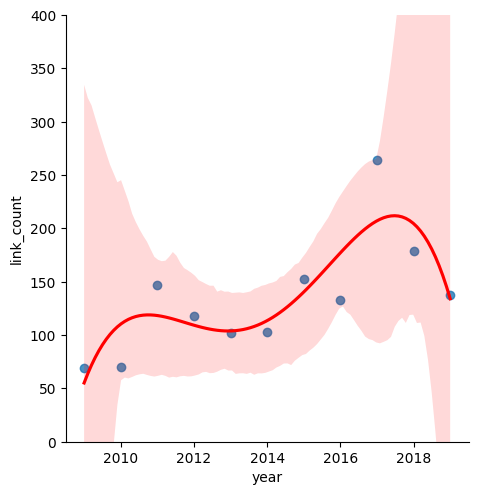

In [ ]:
# prompt: # prompt: plot link_count_by_year_df by like_count and year and add a trend line, y axis from 0-1000

import matplotlib.pyplot as plt
sns.lmplot(x="year", y="link_count", data=link_count_by_year_df, order=4, line_kws={'color': 'red'})
plt.ylim(0, 400)
plt.show()


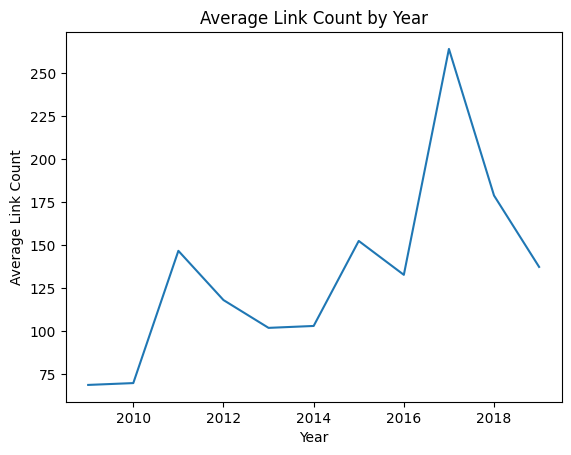

In [ ]:
# prompt: plot link_count_by_year_df by like_count and year

import matplotlib.pyplot as plt

plt.plot(link_count_by_year_df['year'], link_count_by_year_df['link_count'])
plt.xlabel('Year')
plt.ylabel('Average Link Count')
plt.title('Average Link Count by Year')
plt.show()
